# Project Business Statistics: E-news Express

**Marks: 60**

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.





### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the dataset

In [3]:
# complete the code below to load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BusinessStatistics/Project/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [4]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [5]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [6]:
# view the shape of the dataset
df.shape

(100, 6)

#### Checking the data types of the columns for the dataset

In [7]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Getting the statistical summary for the numerical variables

In [8]:
# write your code here to print the numerical summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Getting the statistical summary for the categorical variables

In [9]:
# write your code here to print the categorical summary statistics
df.describe(include=['object'])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


### Check for missing values

In [10]:
# write your code for checking missing values.
df.isna().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [11]:
#Write code to find unique values in each categorical fields.
df['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

### Check for duplicates

In [12]:
# write your code here
duplicates = df.duplicated(subset='user_id')
duplicates.sum()

0

### Univariate Analysis

#### Time spent on the page

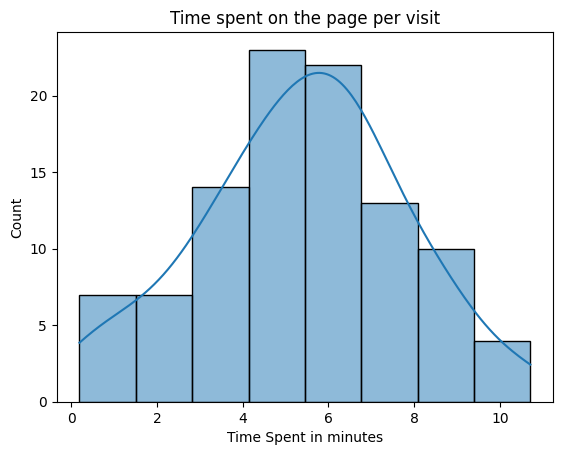

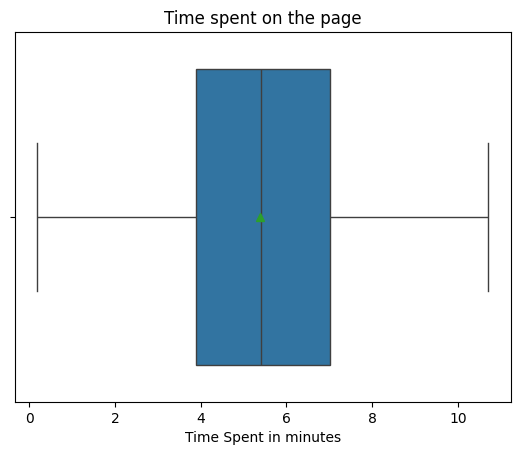

In [13]:
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.title('Time spent on the page per visit')
plt.xlabel('Time Spent in minutes')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page',showmeans=True)
plt.title('Time spent on the page')
plt.xlabel('Time Spent in minutes')
plt.show()

#### Group

In [14]:
df['group'].value_counts()

,count
group,
control,50
treatment,50


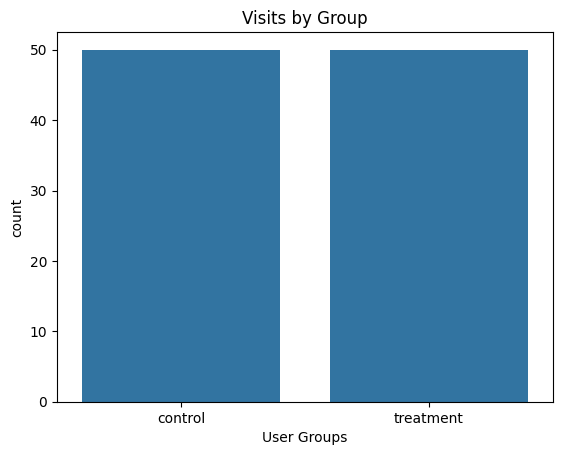

In [15]:
sns.countplot(data=df,x='group')
plt.title('Visits by Group')
plt.xlabel('User Groups')
plt.show()

#### Landing page

In [16]:
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


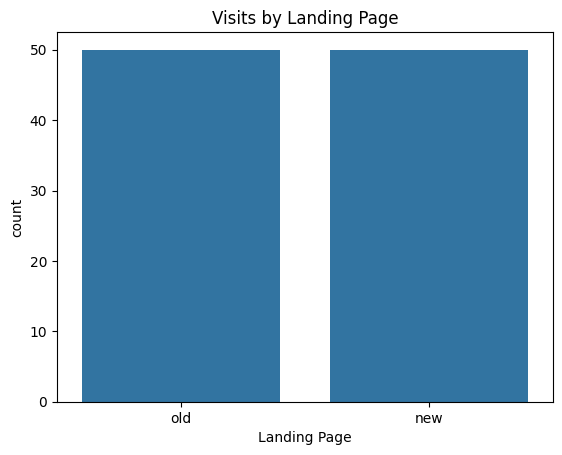

In [17]:
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page')
plt.title('Visits by Landing Page')
plt.xlabel('Landing Page')
plt.show()

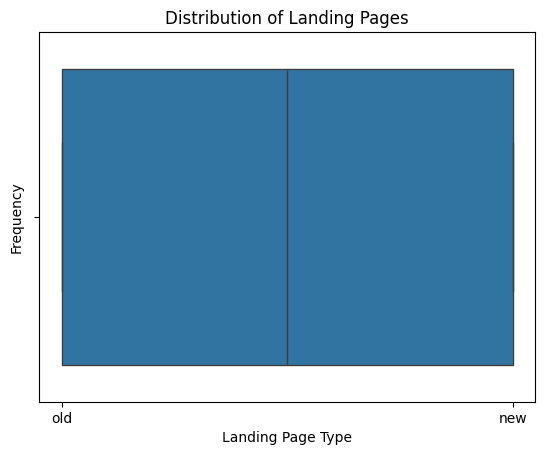

In [18]:
sns.boxplot(x=df['landing_page'])

plt.title('Distribution of Landing Pages')
plt.xlabel('Landing Page Type')
plt.ylabel('Frequency')
plt.show()

#### Converted

In [19]:
df['converted'].value_counts()

,count
converted,
yes,54
no,46


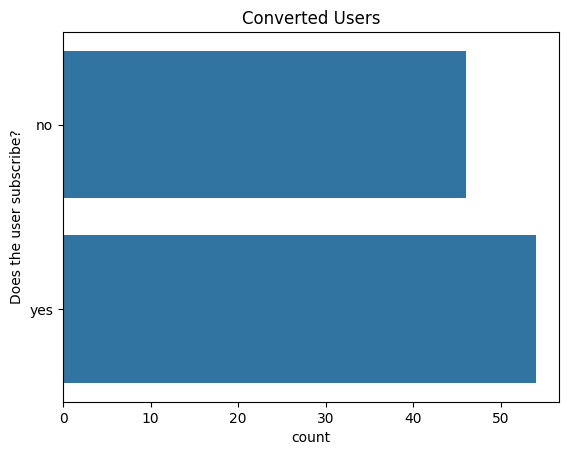

In [20]:
# complete the code to plot the countplot
sns.countplot(data=df,y='converted')
plt.title('Converted Users')
plt.ylabel('Does the user subscribe?')
plt.show()

#### Language preferred

In [21]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


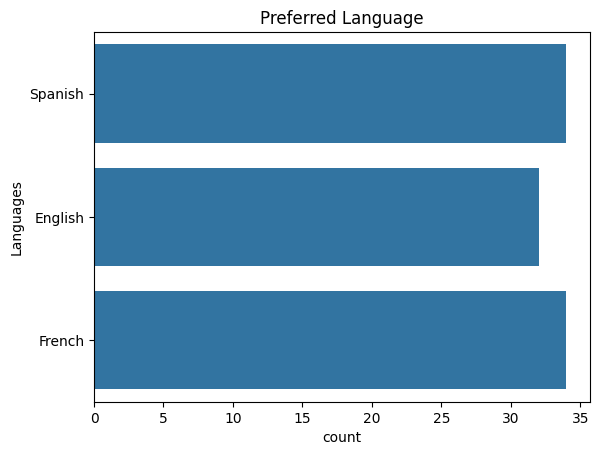

In [22]:
# complete the code to plot the countplot
sns.countplot(data=df,y='language_preferred')
plt.title('Preferred Language')
plt.ylabel('Languages')
plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

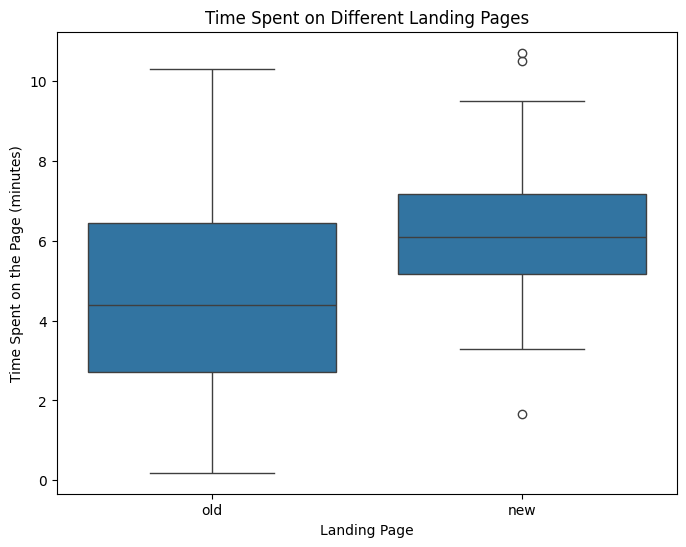

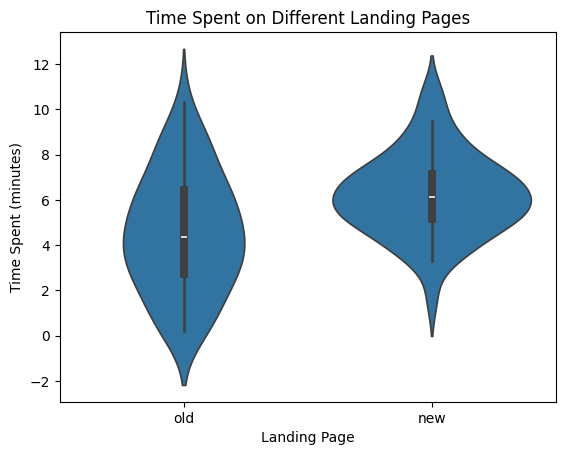

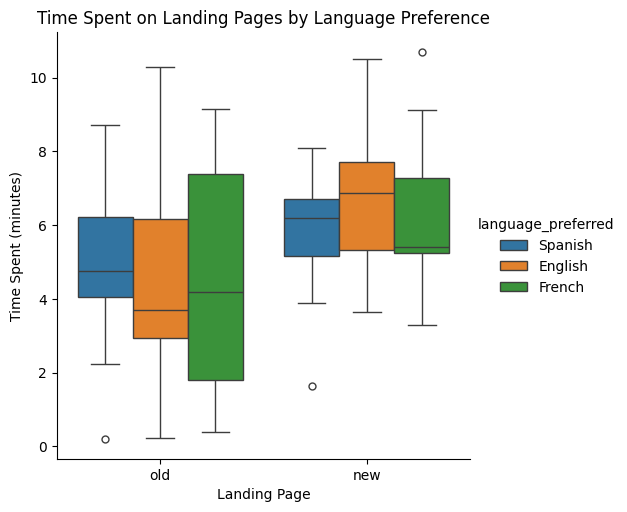

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.title('Time Spent on Different Landing Pages')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()
sns.violinplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.title('Time Spent on Different Landing Pages')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent (minutes)')
plt.show()
sns.catplot(x='landing_page', y='time_spent_on_the_page', hue='language_preferred', kind='box', data=df)
plt.title('Time Spent on Landing Pages by Language Preference')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent (minutes)')
plt.show()

In [24]:
dfnew = df[df['landing_page']=='new']
dfold = df[df['landing_page']=='old']
dfnew.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50.0,546467.5000,14.577380,546443.00,546455.250,546467.500,546479.75,546492.00
time_spent_on_the_page,50.0,6.2232,1.817031,1.65,5.175,6.105,7.16,10.71


In [25]:
dfold.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50.0,546566.5000,17.677670,546493.00,546555.25,546567.50,546579.7500,546592.0
time_spent_on_the_page,50.0,4.5324,2.581975,0.19,2.72,4.38,6.4425,10.3


In [26]:
from scipy.stats import norm
dfnew_med = dfnew['time_spent_on_the_page'].median()
dfold_med = dfold['time_spent_on_the_page'].median()
dfnew_mean = dfnew['time_spent_on_the_page'].mean()
dfold_mean = dfold['time_spent_on_the_page'].mean()
dfnew_sd = dfnew['time_spent_on_the_page'].std()
dfold_sd = dfold['time_spent_on_the_page'].std()

pvaluenew = norm.pdf(dfnew_med,dfnew_mean,dfnew_sd)
pvalueold = norm.pdf(dfold_med,dfold_mean,dfold_sd)
print(f'probability of spending meadian time of {dfnew_med:2f} minutes on new landing page is {pvaluenew*100:.2f}%')
print(f'probability of spending meadian time of {dfold_med:2f} minutes on old landing page is {pvalueold*100:.2f}%')

probability of spending meadian time of 6.105000 minutes on new landing page is 21.91%
probability of spending meadian time of 4.380000 minutes on old landing page is 15.42%


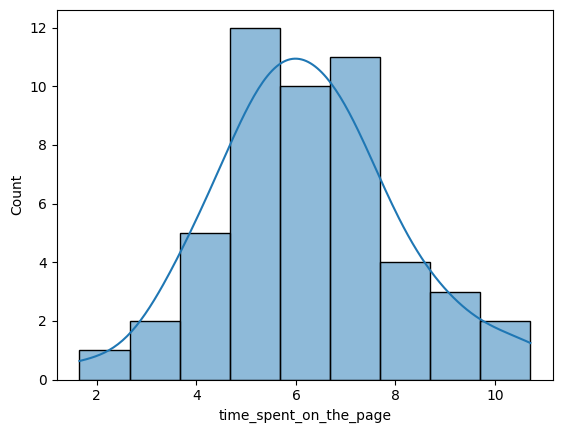

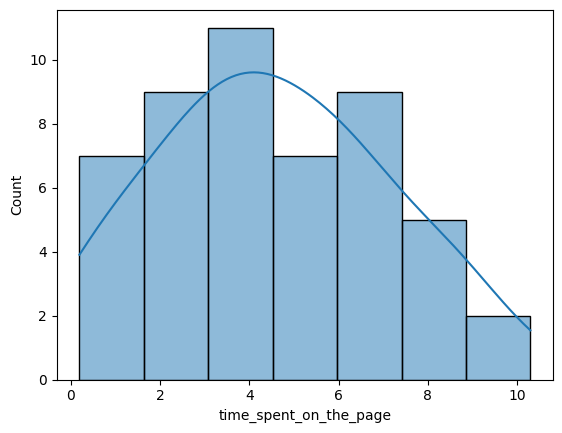

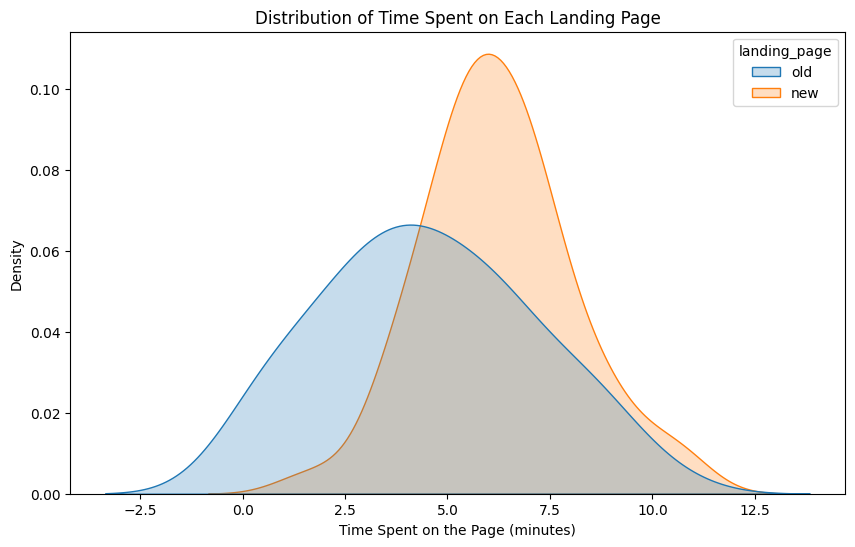

In [27]:
sns.histplot(dfnew,x=dfnew['time_spent_on_the_page'],kde=True)
plt.show()
sns.histplot(dfold,x=dfold['time_spent_on_the_page'],kde=True)
plt.show()
# To create a KDE histogram showing the distribution of time spent on the page for each landing page value,
# we can use seaborn's kdeplot.

plt.figure(figsize=(10, 6))
sns.kdeplot(df, x='time_spent_on_the_page', hue='landing_page', fill=True)
plt.title('Distribution of Time Spent on Each Landing Page')
plt.xlabel('Time Spent on the Page (minutes)')
plt.ylabel('Density')
plt.show()


#### Conversion status vs Time spent on the page

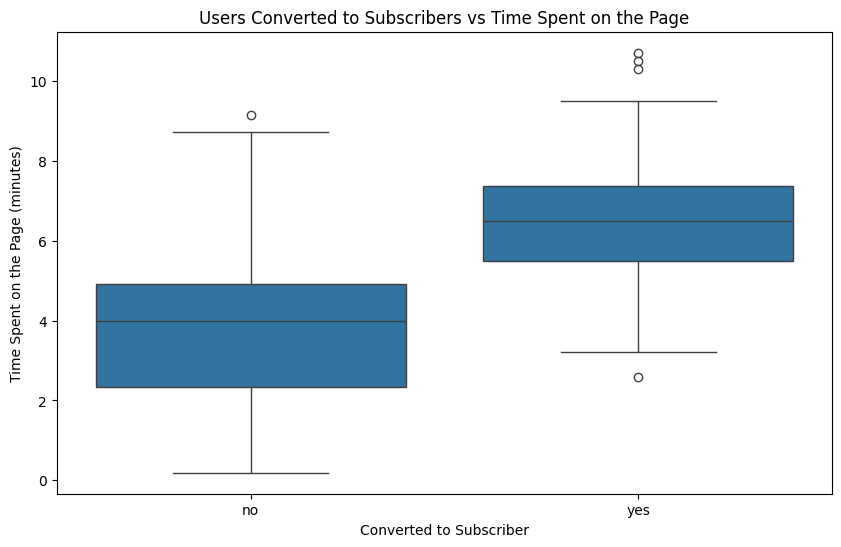

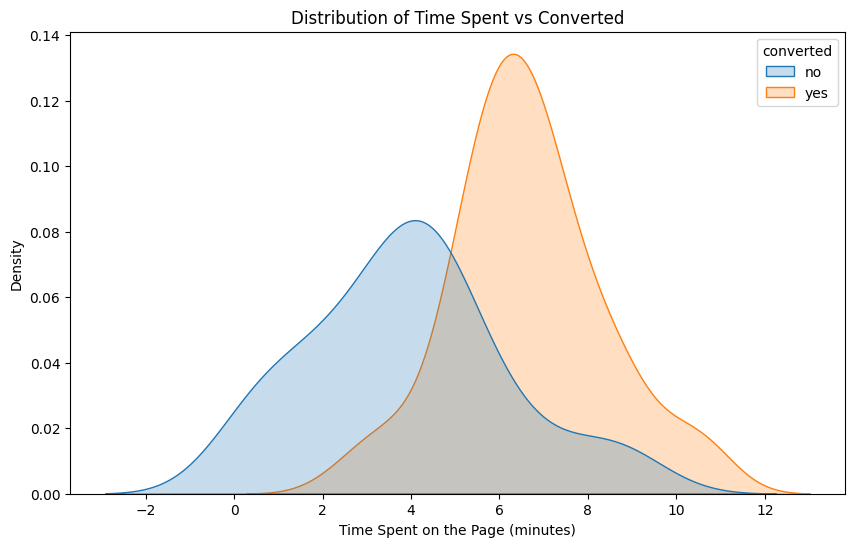

In [28]:
# complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.title('Users Converted to Subscribers vs Time Spent on the Page')
plt.xlabel('Converted to Subscriber')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()
plt.figure(figsize=(10, 6))
sns.kdeplot(df, x='time_spent_on_the_page', hue='converted', fill=True)
plt.title('Distribution of Time Spent vs Converted')
plt.xlabel('Time Spent on the Page (minutes)')
plt.ylabel('Density')
plt.show()

#### Language preferred vs Time spent on the page

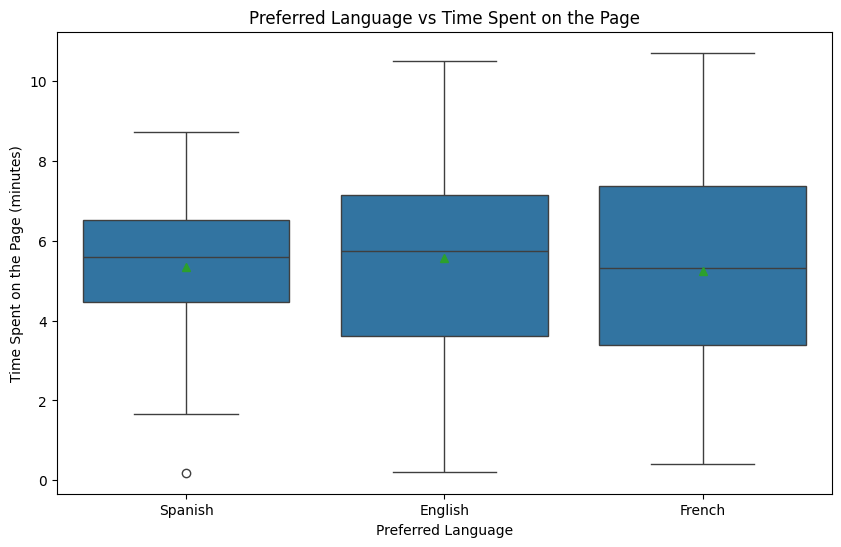

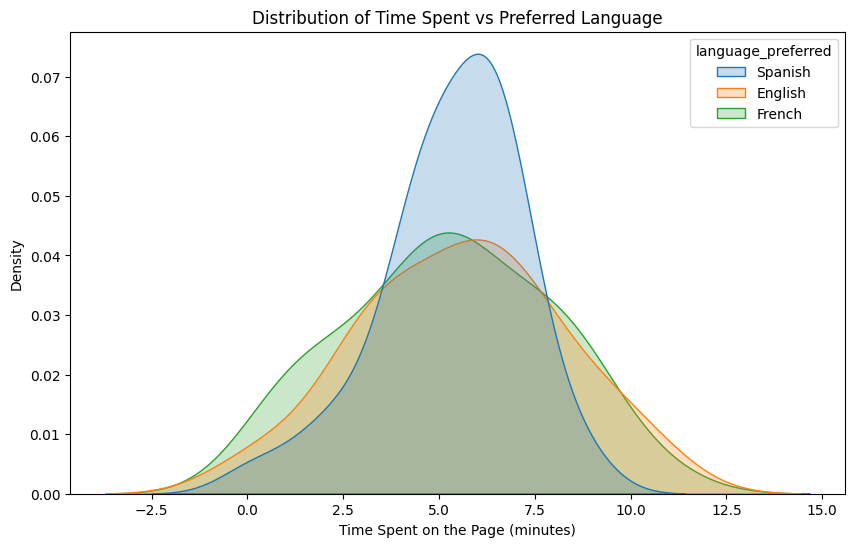

In [29]:
# write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page', showmeans=True)
plt.title('Preferred Language vs Time Spent on the Page')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()
plt.figure(figsize=(10, 6))
sns.kdeplot(df, x='time_spent_on_the_page', hue='language_preferred', fill=True)
plt.title('Distribution of Time Spent vs Preferred Language')
plt.xlabel('Time Spent on the Page (minutes)')
plt.ylabel('Density')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

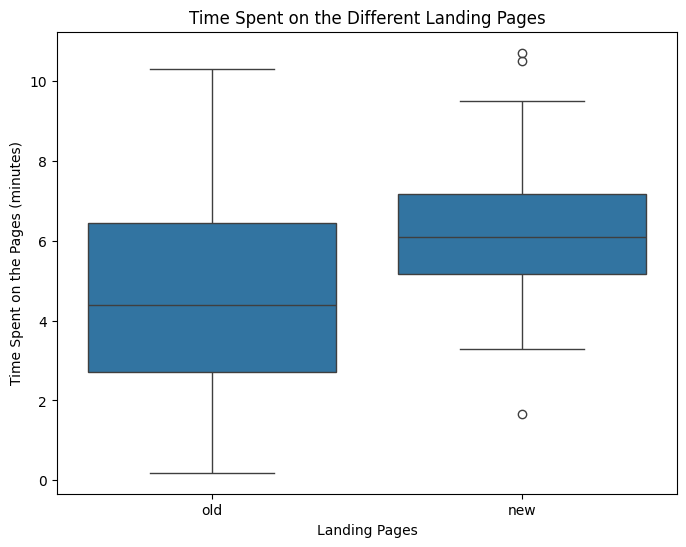

In [30]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.title('Time Spent on the Different Landing Pages')
plt.xlabel('Landing Pages')
plt.ylabel('Time Spent on the Pages (minutes)')
plt.show()

In [31]:
df.groupby('landing_page')['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64

### Step 1: Define the null and alternate hypotheses

Null hypothesis: Average time spent on new page (μ$_1$) is less or equal to average time spent on old page (μ$_2$).

$H_0$: μ$_1$ = μ$_2$

Alternate hypothesis: Average time spent on new page (μ$_1$) is greater than average time spent on old page (μ$_2$).

$H_a$: μ$_1$ > μ$_2$



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [32]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [33]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [34]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat_1, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [35]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

There is enough evidence that users spend more time on new landing page than old landing page.



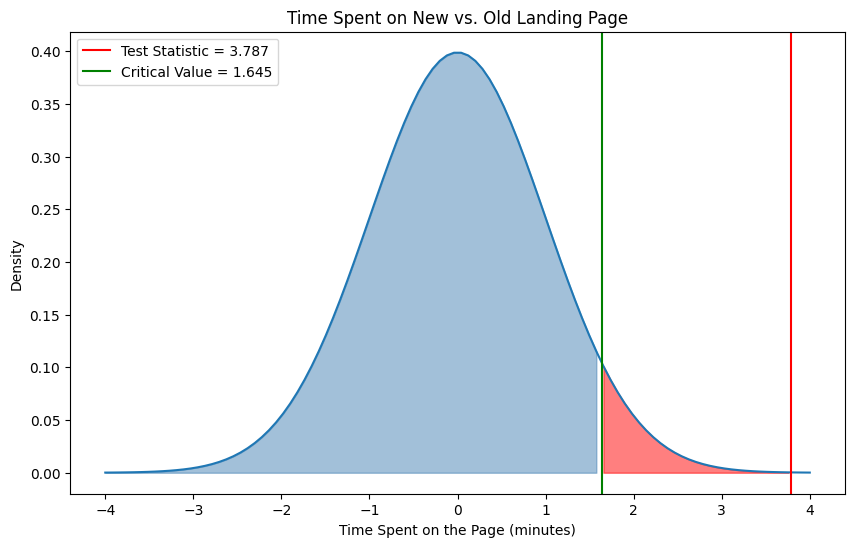

3.7867702694199856
1.6448536269514722


In [36]:
#Create Displot to draw inference
from scipy.stats import norm
crit_value_1 = norm.ppf(1 - 0.05)
plt.figure(figsize=(10, 6))
dfx_1 = np.linspace(-4, 4, 100)
plt.plot(dfx_1, norm.pdf(dfx_1, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = test_stat_1, c = 'r',label=f'Test Statistic = {test_stat_1:.3f}') # draw a vertical red line through the mentioned point
plt.axvline(x = crit_value_1, c = 'g',label=f'Critical Value = {crit_value_1:.3f}') # draw a vertical red line through the mentioned point
if test_stat_1 > crit_value_1:
    # If test_stat is greater, fill to the right of crit_value
    plt.fill_between(dfx_1, norm.pdf(dfx_1, 0, 1), where=(dfx_1 > crit_value_1) & (dfx_1 <= test_stat_1), color='red', alpha=0.5)
    plt.fill_between(dfx_1, norm.pdf(dfx_1, 0, 1), where=(dfx_1 <= crit_value_1), color='steelblue', alpha=0.5)
else:
    # If test_stat is less, fill to the left of crit_value
    plt.fill_between(dfx_1, norm.pdf(dfx_1, 0, 1), where=(dfx_1 < crit_value_1) & (dfx_1 >= test_stat_1), color='green', alpha=0.5)
    plt.fill_between(dfx_1, norm.pdf(dfx_1, 0, 1), where=(dfx_1 >= crit_value_1), color='red', alpha=0.5)

plt.title('Time Spent on New vs. Old Landing Page')
plt.xlabel('Time Spent on the Page (minutes)')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()
print(test_stat_1)
print(crit_value_1)


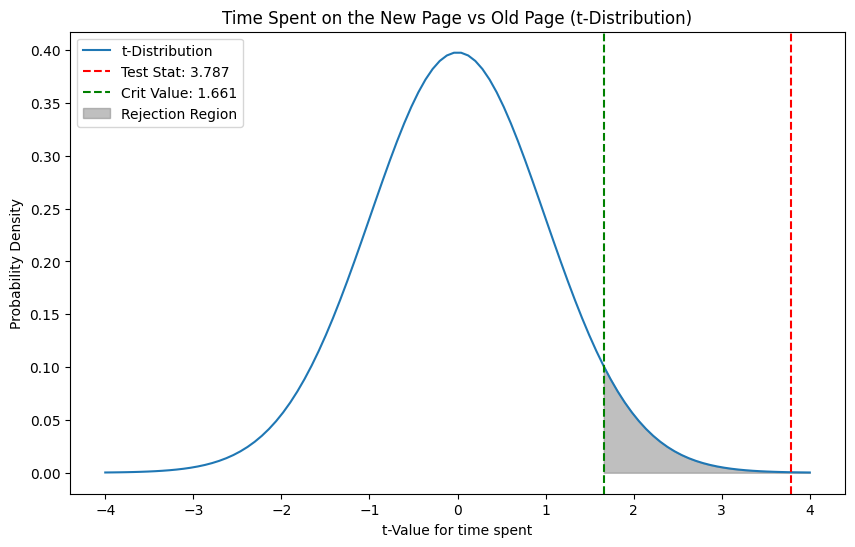

Test Statistic: 3.7867702694199856
Critical t-Value: 1.6605512170440568


In [37]:
from scipy.stats import t

# Example values, replace with your actual values
dof = 98  # degrees of freedom, n1 + n2 - 2 for a 2-sample t-test

# Calculate the critical t-value for a one-tailed test
crit_value_1_1 = t.ppf(1 - 0.05, dof)

# Define the x-axis range for the plot
dfx_1_1 = np.linspace(-4, 4, 100)

# Plot the t distribution
plt.figure(figsize=(10, 6))
plt.plot(dfx_1_1, t.pdf(dfx_1_1, dof), label='t-Distribution')

# Add vertical lines for the test statistic and critical value
plt.axvline(x=test_stat_1, color='red', linestyle='--', label=f'Test Stat: {test_stat_1:.3f}')
plt.axvline(x=crit_value_1_1, color='green', linestyle='--', label=f'Crit Value: {crit_value_1_1:.3f}')

# Fill the area under the curve beyond the critical value if test_stat > crit_value
if test_stat_1 > crit_value_1_1:
    x_fill = np.linspace(crit_value_1_1, 4, 100)
    plt.fill_between(x_fill, t.pdf(x_fill, dof), color='gray', alpha=0.5, label='Rejection Region')

# Add legend and labels
plt.legend()
plt.title('Time Spent on the New Page vs Old Page (t-Distribution)')
plt.xlabel('t-Value for time spent')
plt.ylabel('Probability Density')

# Show the plot
plt.show()

# Print the test statistic and critical value
print(f'Test Statistic: {test_stat_1}')
print(f'Critical t-Value: {crit_value_1_1}')

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

<Figure size 600x1000 with 0 Axes>

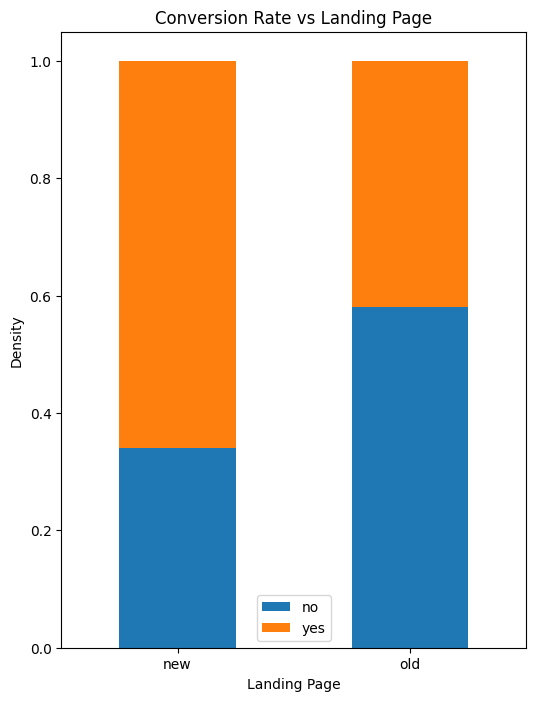

In [38]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
plt.figure(figsize=(6,10))
ax = pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.title('Conversion Rate vs Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Density')
ax.set_xticklabels(['new','old'], rotation=0)
plt.legend()
plt.show()

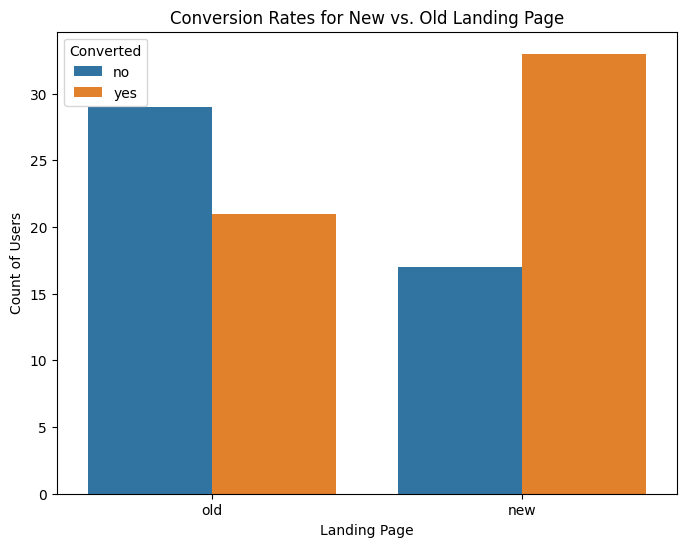

In [39]:
#Relation between converted users to landing page
plt.figure(figsize=(8, 6))
sns.countplot(x='landing_page', hue='converted', data=df)
plt.title('Conversion Rates for New vs. Old Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Count of Users')
plt.legend(title='Converted')
plt.show()

In [40]:
df.groupby('landing_page')['converted'].value_counts().unstack()

converted,no,yes
landing_page,,
new,17,33
old,29,21


### Step 1: Define the null and alternate hypotheses

$H_0:$ Users conversion rate is in the same proportion for both landing pages, old and new.

$H_a:$ Users conversion rate is porportionately higher for new landing page than for old landing page.



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, two sample proportion test will be the appropriate test in this scenario**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [41]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [42]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest

# write the code to calculate the p-value
test_stat_2, p_value_2 = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value_2)
print('The test statistic is', test_stat_2)

The p-value is 0.008026308204056278
The test statistic is 2.4077170617153842


### Step 6: Compare the p-value with $\alpha$

In [43]:
# print the conclusion based on p-value
if p_value_2 < 0.05:
    print(f'As the p-value {p_value_2} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_2} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The p-value is 0.008 which is lesser than significance level of 0.05. We **reject the null hypothesis**. We can make an inference that there is sufficient evidence to suggest that **users spend more time** on new landing page than on old landing page.



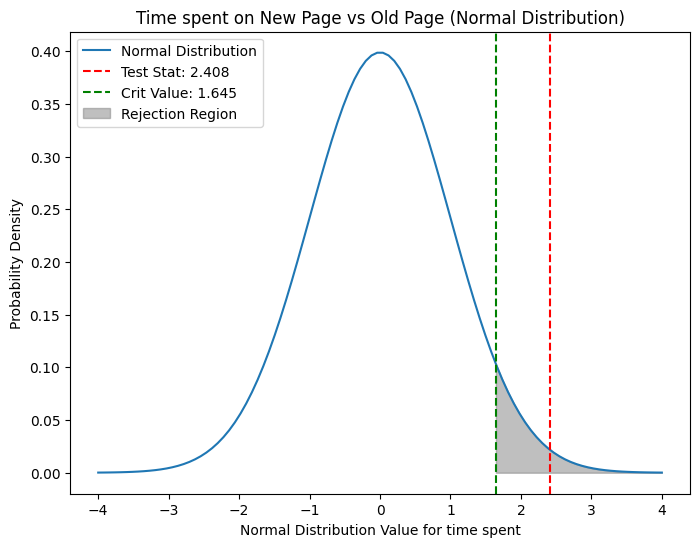

Test Statistic: 2.4077170617153842
Critical t-Value: 1.6448536269514722


In [44]:
#Create normal distribution plot
from scipy.stats import norm

# Calculate the critical t-value for a one-tailed test
crit_value_2 = norm.ppf(1 - 0.05)

# Define the x-axis range for the plot
dfx_2 = np.linspace(-4, 4, 100)

# Plot the normal distribution
plt.figure(figsize=(8, 6))
plt.plot(dfx_2, norm.pdf(dfx_2), label='Normal Distribution')

# Add vertical lines for the test statistic and critical value
plt.axvline(x=test_stat_2, color='red', linestyle='--', label=f'Test Stat: {test_stat_2:.3f}')
plt.axvline(x=crit_value_2, color='green', linestyle='--', label=f'Crit Value: {crit_value_2:.3f}')

# Fill the area under the curve beyond the critical value if test_stat > crit_value
if test_stat_2 > crit_value_2:
    x_fill = np.linspace(crit_value_2, 4, 100)
    plt.fill_between(x_fill, norm.pdf(x_fill), color='gray', alpha=0.5, label='Rejection Region')

# Add legend and labels
plt.legend()
plt.title('Time spent on New Page vs Old Page (Normal Distribution)')
plt.xlabel('Normal Distribution Value for time spent')
plt.ylabel('Probability Density')

# Show the plot
plt.show()

# Print the test statistic and critical value
print(f'Test Statistic: {test_stat_2}')
print(f'Critical t-Value: {crit_value_2}')

## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

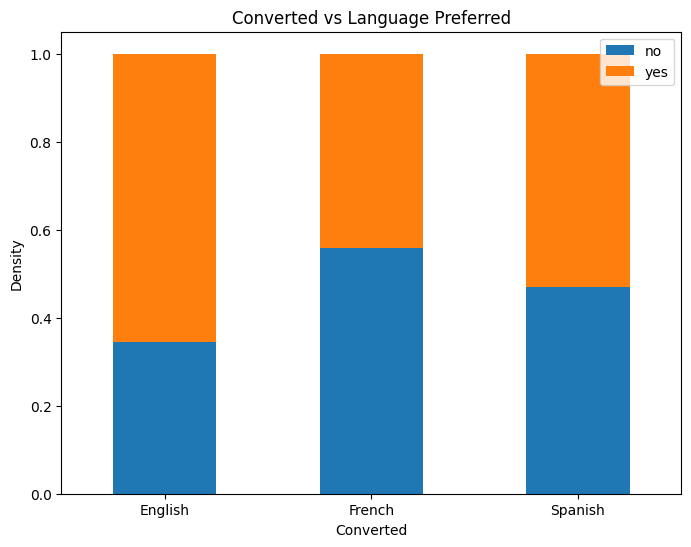

In [45]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
ax = pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(8,6), stacked=True)
plt.title('Converted vs Language Preferred')
plt.xlabel('Converted')
plt.ylabel('Density')
ax.set_xticklabels(['English','French', 'Spanish'], rotation=0)
plt.legend()
plt.show()


### Step 1: Define the null and alternate hypotheses

$H_0:$ The conversion rate is independent of the preferred language.

$H_a:$ The conversion rate is influenced by the preferred language.



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, we can use chi-square test for independence.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [46]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [47]:
# complete the code to import the required function
from scipy.stats import chi2_contingency

# write the code to calculate the p-value
chi_value, p_value_3, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value_3)
print('The chi is', chi_value)

The p-value is 0.21298887487543447
The chi is 3.0930306905370837


### Step 6: Compare the p-value with $\alpha$

In [48]:
# print the conclusion based on p-value
if p_value_3 < 0.05:
    print(f'As the p-value {p_value_3} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_3} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is significantly higher than signifiance level, we fail to reject the null hypothesis. We conclude that there isn't sufficient evidence that preferred languages influence conversion rate.



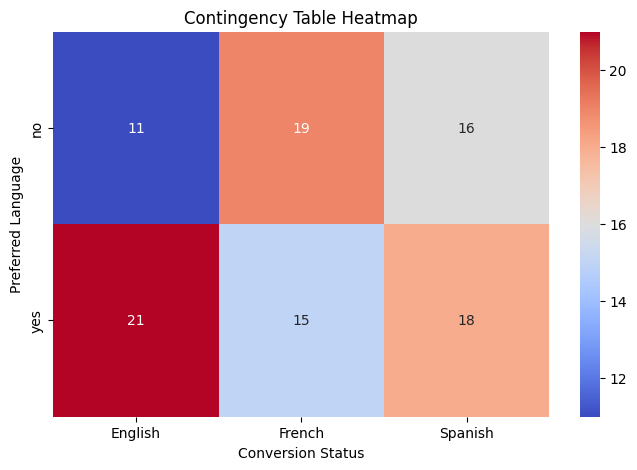

In [49]:
#Create Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Contingency Table Heatmap')
plt.ylabel('Preferred Language')
plt.xlabel('Conversion Status')
plt.show()

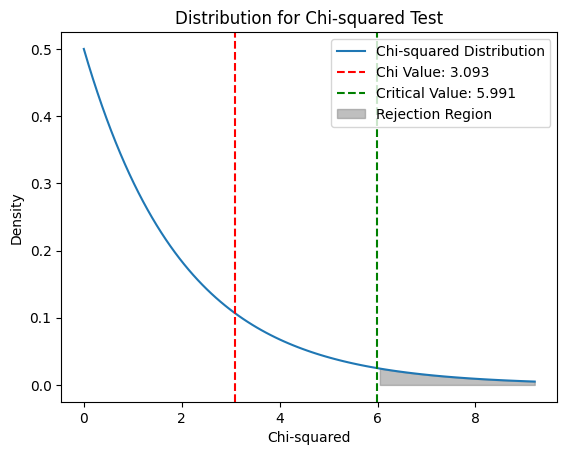

chi (test statistic) value is 3.0930
critical value is 5.9915


In [50]:
from scipy.stats import chi2

# Given values
#chi_value = chi2
dof = 2  # degrees of freedom for the chi-squared distribution

# Calculate the critical chi-squared value
crit_value_3 = chi2.ppf(1 - 0.05, dof)

# Define the range for x values
dfx_3 = np.linspace(0, chi2.ppf(0.99, dof), 100)

# Get the chi-squared distribution values for the dof
dfy_3 = chi2.pdf(dfx_3, dof)

# Plot the distribution
plt.plot(dfx_3, dfy_3, label='Chi-squared Distribution')

# Plot the chi-squared value
plt.axvline(chi_value, color='red', linestyle='--', label=f'Chi Value: {chi_value:.3f}')

# Plot the critical value
plt.axvline(crit_value_3, color='green', linestyle='--', label=f'Critical Value: {crit_value_3:.3f}')

# Fill the area for the critical region
plt.fill_between(dfx_3, dfy_3, where=(dfx_3 > crit_value_3), color='grey', alpha=0.5, label='Rejection Region')

# Add legend and labels
plt.legend()
plt.title('Distribution for Chi-squared Test')
plt.xlabel('Chi-squared')
plt.ylabel('Density')
plt.show()

print(f'chi (test statistic) value is {chi_value:.4f}')
print(f'critical value is {crit_value_3:.4f}')

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [51]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 50 non-null     int64  
 1   group                   50 non-null     object 
 2   landing_page            50 non-null     object 
 3   time_spent_on_the_page  50 non-null     float64
 4   converted               50 non-null     object 
 5   language_preferred      50 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ KB


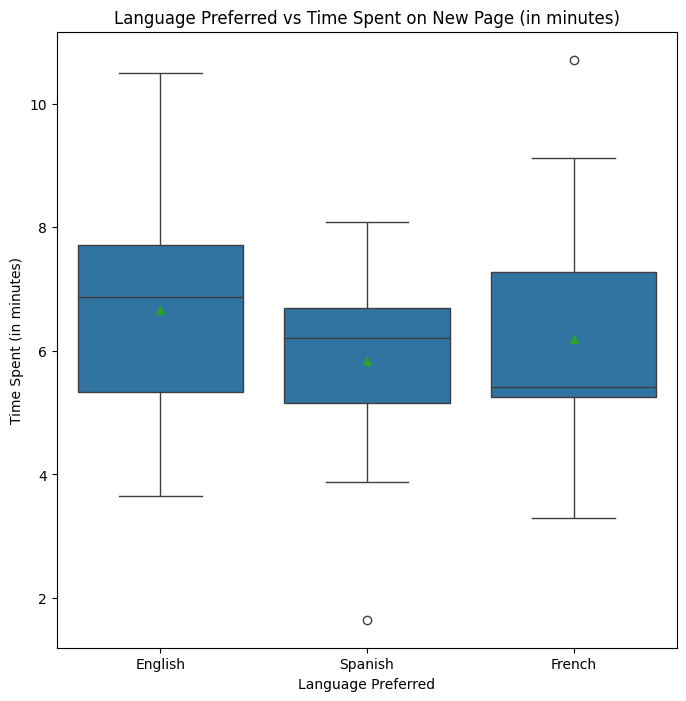

In [53]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = df_new['language_preferred'], y = df_new['time_spent_on_the_page'], showmeans = True, data = df_new)
plt.title('Language Preferred vs Time Spent on New Page (in minutes)')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent (in minutes)')
plt.show()


In [54]:
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()


,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


### Step 1: Define the null and alternate hypotheses

$H_0:$ There is no difference between means of time spent of the page among different languages.

$H_a:$ Time spent on the page differs for at least one preferred language.



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, we can use ANOVA test to compare variance of different language groups.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [55]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']   # complete your code here

### Step 5: Calculate the p-value

In [56]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat_f, p_value_f = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value_f)
print('The test statistic for f is',test_stat_f)

The p-value is 0.43204138694325955
The test statistic for f is 0.8543992770006822


### Step 6: Compare the p-value with $\alpha$

In [57]:
# print the conclusion based on p-value
if p_value_f < 0.05:
    print(f'As the p-value {p_value_f} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_f} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Our tests show that **p-value is larger than significance level** hence **we failed to reject null hypothesis**. This allows us to conclude that there is **no significant evidence** that time spent on the page is different for different language.



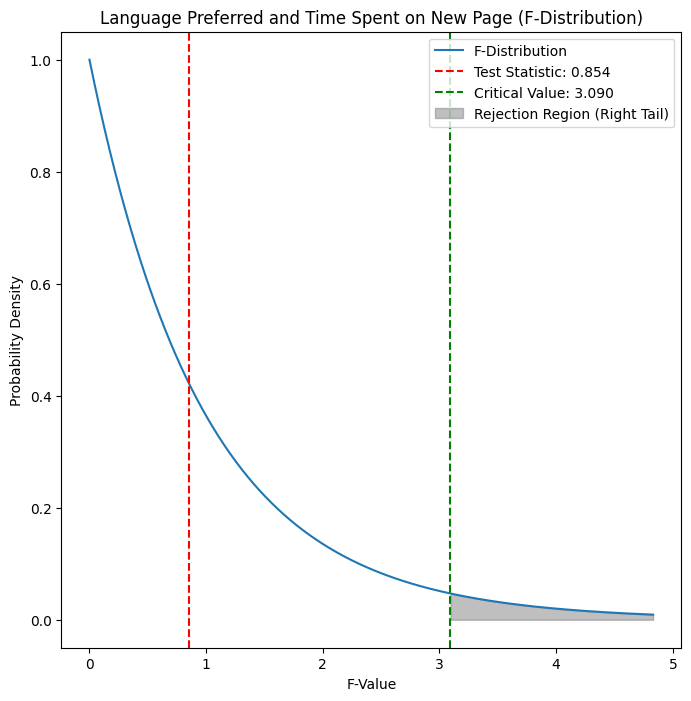

Critical value is 3.090
f value is 0.854


In [58]:
from scipy.stats import f

# Example values for the ANOVA F-distribution plot
f_value = test_stat_f  # your F statistic value from ANOVA
p_value = p_value_f  # The p-value from the ANOVA test
dfn = 2  # number of language groups - 1
dfd = 97  # number of observations - number of groups
significance_level = 0.05

# Calculate the critical F-value for a one-tailed test
critical_value_f = f.ppf(1 - significance_level, dfn, dfd)

# Create a range of x values for the F-distribution
x_f = np.linspace(0, f.ppf(0.99, dfn, dfd), 1000)

# Create the F-distribution for the plot
y_f = f.pdf(x_f, dfn, dfd)

# Plot the F-distribution
plt.figure(figsize=(8, 8))
plt.plot(x_f, y_f, label='F-Distribution')

# Add a vertical line for the F-value (test statistic from ANOVA)
plt.axvline(f_value, color='red', linestyle='--', label=f'Test Statistic: {f_value:.3f}')

# Add a vertical line for the critical value at the significance level
plt.axvline(critical_value_f, color='green', linestyle='--', label=f'Critical Value: {critical_value_f:.3f}')

# Fill the area under the curve beyond the critical value (for a one-tailed test)
plt.fill_between(x_f, y_f, where=(x_f >= critical_value_f), color='gray', alpha=0.5, label='Rejection Region (Right Tail)')

# Add legend and labels
plt.legend()
plt.title('Language Preferred and Time Spent on New Page (F-Distribution)')
plt.xlabel('F-Value')
plt.ylabel('Probability Density')

# Show the plot
plt.show()

print(f'Critical value is {critical_value_f:.3f}')
print(f'f value is {f_value:.3f}')


## Conclusion and Business Recommendations


### Conclusion
* Analytical rigor confirmed that the new landing page enhances user engagement, a victory for e-news express’s design and content teams.
* Hypothesis testing robustly supported the superiority of the new landing page design in fostering user engagement and increasing conversion likelihood.
* Adherence to statistical prerequisites, such as normality and equal variance, solidified the foundation for hypothesis tests.
* The surge in conversion rates for the new page underscores its efficacy and its potential for further optimization.
* For the hypothesis on time spent on the new versus old landing page, our analysis confirms that users are more engaged with the new design, spending a significantly longer time on average.
* The conversion rate hypothesis reveals a higher rate for the new page, indicating that its design resonates better with visitors, leading to more subscriptions.
* Regarding the language preference, our findings suggest that while there is variation in time spent, it does not significantly affect conversion rates, highlighting the content's universal appeal regardless of language.
* Finally, the analysis of time spent across different languages shows no substantial difference, proving that the new landing page's design has a consistently positive impact across language groups.



### Business Recommendations
* Embrace the innovative new landing page design wholeheartedly as it has proven to elevate user experience significantly.
* Zero-in on enhancing English-language content, seizing the opportunity to amplify the strongest conversion rates.
* Craft targeted initiatives for French and Spanish landing pages, tapping into uncharted engagement potential to drive growth.
* Continue the practice of A/B testing rigorously, fostering a culture of constant improvement and innovation.
* Maintain high standards for data excellence, ensuring that strategies are informed by quality-driven insights.
* Investigate deeper into linguistic preferences, personalizing content to resonate with the global audience's diverse tapestry.
* Leverage these rich insights to sculpt content strategies and marketing campaigns that are data-informed and user-centric.
* Commit to a cycle of regular review and refinement of engagement metrics, sustaining the upward trajectory of user interaction.


___